In [1]:
import pickle
import pandas as pd
import numpy as np

In [2]:

from IPython.display import Audio
import torch
import torchaudio
from IPython.display import Audio, display

/data/ephraim/CDiffuSE/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/data/ephraim/CDiffuSE/.venv/lib/python3.8/site-packages/torchaudio/backend/utils.py:53: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  warnings.warn(


In [4]:
pkl_results_file = "SE_measures_mode2.pickle"
with open(pkl_results_file, "rb") as handle:
    results = pickle.load(handle)

AttributeError: 'dict' object has no attribute 'descrice'

In [9]:
df = pd.DataFrame.from_dict(results)
df["pesq_diff"] = df["pesq_enhanced"].sub(df["pesq_noisy"])
df["stoi_diff"] = df["stoi_enhanced"].sub(df["stoi_noisy"])




In [12]:
(
    df[[
        "pesq_noisy",
        "stoi_noisy",
        "pesq_enhanced",
        "stoi_enhanced",
        "pesq_diff",
        "stoi_diff",
    ]].describe()
)

,pesq_noisy,stoi_noisy,pesq_enhanced,stoi_enhanced,pesq_diff,stoi_diff
count,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000
mean,1.970835,0.921086,2.645921,0.925985,0.675087,0.004899
std,0.753248,0.070952,0.645769,0.062959,0.404727,0.016466
min,1.031246,0.560032,1.229977,0.591346,-0.579006,-0.070348
25%,1.290071,0.887223,2.193447,0.893281,0.383648,-0.003455
50%,1.796571,0.940099,2.666502,0.943750,0.604530,0.002390
75%,2.552874,0.975418,3.091064,0.974250,0.927740,0.012899
max,4.300500,0.999815,4.243578,0.998613,2.058601,0.080587


In [5]:
print(
    df[
        [
            "sisdr_est_noisy",
            "sisdr_est_enhanced",
            "mos_est_noise",
            "mos_est_enhanced"

        ]
    ].describe()
)

       sisdr_est_noisy  sisdr_est_enhanced  mos_est_noise  mos_est_enhanced
count       824.000000          824.000000     824.000000        824.000000
mean          8.567488           20.233893       2.657914          2.994785
std           5.629465            4.487247       0.622766          0.521250
min          -3.134989            8.274318       2.002665          2.002660
25%           2.725704           16.137329       2.079155          2.584637
50%           8.109539           20.840709       2.485631          3.079947
75%          12.656152           24.099137       3.132526          3.423149
max          23.890188           28.136868       4.994561          4.171928


In [6]:
print(
    df[
        [
            "pesq_noisy",
            "pesq_enhanced",
            "stoi_noisy",
            "stoi_enhanced",
            "pesq_est",
            "pesq_est_enhanced",
            "stoi_est_noisy",
            "stoi_est_enhanced"
        ]
    ].describe()
)

       pesq_noisy  pesq_enhanced  stoi_noisy  stoi_enhanced    pesq_est  \
count  824.000000     824.000000  824.000000     824.000000  824.000000   
mean     1.970894       2.485738    0.921046       0.911887    2.312226   
std      0.752793       0.546866    0.070918       0.053772    0.776100   
min      1.031246       1.056885    0.560032       0.548409    1.100813   
25%      1.290388       2.140851    0.887391       0.886999    1.650657   
50%      1.797897       2.574089    0.940031       0.926333    2.240017   
75%      2.552865       2.886577    0.975415       0.952019    2.880762   
max      4.300500       3.642150    0.999815       0.980220    4.227460   

       pesq_est_enhanced  stoi_est_noisy  stoi_est_enhanced  
count         824.000000      824.000000         824.000000  
mean            3.125433        0.959468           0.989347  
std             0.641832        0.052560           0.021323  
min             1.311159        0.642317           0.732782  
25%           

In [7]:
print(
    df[
        [
            "stoi_diff",
            "stoi_est_diff",
            "pesq_diff",
            "pesq_est_diff",
            "sisdr_est_est_diff",
            "mos_est_diff"
        ]
    ].describe()
)

        stoi_diff  stoi_est_diff   pesq_diff  pesq_est_diff  \
count  824.000000     824.000000  824.000000     824.000000   
mean    -0.009159       0.029879    0.514845       0.813207   
std      0.024376       0.038482    0.422548       0.380698   
min     -0.062583      -0.109934   -1.262692      -0.836443   
25%     -0.025193       0.002869    0.257724       0.588929   
50%     -0.016180       0.016646    0.539401       0.871743   
75%     -0.000415       0.043874    0.771252       1.079712   
max      0.100356       0.208271    1.647539       1.772502   

       sisdr_est_est_diff  mos_est_diff  
count          824.000000    824.000000  
mean            11.666404      0.336871  
std              2.105273      0.458075  
min              1.192838     -1.052831  
25%             10.161902      0.019947  
50%             12.183467      0.314140  
75%             13.206152      0.625664  
max             16.679481      2.020365  


In [8]:
results["stoi_est_noisy"]["p257_211.wav"]

0.7921822667121887

In [22]:
# new_dict={"pesq_noisy": {}, "pesq_enhanced": {},"stoi_noisy": {}, "stoi_enhanced": {}}
# for filename,file_data in results.items():
#     # for noisy_enhanced, data_dic in file_data.items():
#     new_dict["pesq_noisy"][filename] = np.mean(file_data["noisy"]["pesq"])
#     new_dict["pesq_enhanced"][filename] = np.mean(file_data["enhanced"]["pesq"])
#     new_dict["stoi_noisy"][filename] = np.mean(file_data["noisy"]["stoi"])
#     new_dict["stoi_enhanced"][filename] = np.mean(file_data["enhanced"]["stoi"])


In [11]:
df = pd.DataFrame.from_dict(results)
df["pesq_diff"] = df["pesq_enhanced"].sub(df["pesq_noisy"])
df["stoi_diff"] = df["stoi_enhanced"].sub(df["stoi_noisy"])
df.head()

,pesq_noisy,stoi_noisy,stoi_est_noisy,pesq_est,sisdr_est_noisy,pesq_enhanced,stoi_enhanced,stoi_est_enhanced,pesq_est_enhanced,sisdr_est_enhanced,mos_est_noise,mos_est_enhanced,pesq_diff,stoi_diff
p232_001.wav,2.922585,0.896575,0.999820,3.706482,15.801972,2.743183,0.877639,0.999882,4.169001,26.796238,4.150528,3.754452,-0.179402,-0.018936
p232_002.wav,3.060069,0.969539,0.999250,3.390979,11.470918,3.236144,0.947898,0.997434,3.640864,22.706230,3.951606,3.873520,0.176075,-0.021641
p232_003.wav,2.807454,0.971781,0.999019,3.309171,7.092555,3.142090,0.949148,0.997851,3.683066,18.349648,3.475603,3.562142,0.334636,-0.022633
p232_005.wav,1.333063,0.881983,0.945982,1.431515,2.339334,1.902496,0.887424,0.978951,2.219635,11.176705,2.018214,2.065934,0.569433,0.005441
p232_006.wav,2.198710,0.965082,0.986035,2.603071,17.379326,2.703741,0.946626,0.998211,3.376114,25.812897,3.152938,3.525351,0.505030,-0.018455


In [12]:
df.describe().head()

,pesq_noisy,stoi_noisy,stoi_est_noisy,pesq_est,sisdr_est_noisy,pesq_enhanced,stoi_enhanced,stoi_est_enhanced,pesq_est_enhanced,sisdr_est_enhanced,mos_est_noise,mos_est_enhanced,pesq_diff,stoi_diff
count,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000
mean,1.970894,0.921046,0.959468,2.312226,8.567488,2.485738,0.911887,0.989347,3.125433,20.233893,2.657914,2.994785,0.514845,-0.009159
std,0.752793,0.070918,0.052560,0.776100,5.629465,0.546866,0.053772,0.021323,0.641832,4.487247,0.622766,0.521250,0.422548,0.024376
min,1.031246,0.560032,0.642317,1.100813,-3.134989,1.056885,0.548409,0.732782,1.311159,8.274318,2.002665,2.002660,-1.262692,-0.062583
25%,1.290388,0.887391,0.946647,1.650657,2.725704,2.140851,0.886999,0.990164,2.680485,16.137329,2.079155,2.584637,0.257724,-0.025193


<Axes: title={'center': 'stoi_diff'}, ylabel='Frequency'>

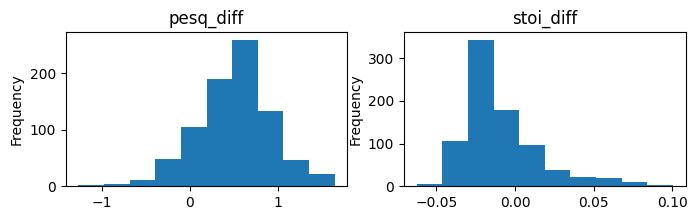

In [45]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 2))
# fig, ax = plt.subplots((1, 2), figsize=(3, 2))
df["pesq_diff"].plot(kind="hist", ax=ax1, title="pesq_diff")
# fig2, ax2 = plt.subplots((2, 2), figsize=(3, 2))
df["stoi_diff"].plot(kind="hist", ax=ax2, title="stoi_diff")

In [29]:
import os


def display_all(df_):
    parent_dir = "/data/ephraim/datasets_16k/"
    clean, noisy, enhanced = (
        "/data/ephraim/datasets_16k/clean_testset_wav",
        "/data/ephraim/datasets_16k/noisy_testset_wav",
        "/data/ephraim/output/Enhanced/pretrained_base/model370200/test/voicebank_Noisy_Test",
    )
    for fname in df_.index:
        print("*********")
        print(fname)
        for type_ in [clean, noisy, enhanced]:
            path = os.path.join(type_, fname)
            print(path)
            display(Audio(path, rate=16000, autoplay=False))

In [46]:
display_all(df.nsmallest(3,['pesq_noisy']))